In [80]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [81]:
file_path = "data\\hands2D.mat"
x=0
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")
        x=mat_file[key].shape[0]
    print(mat_file.keys())

Dataset: shapes, Shape: (40, 56, 2)
<KeysViewHDF5 ['shapes']>


In [82]:
file_path = "data\\hands2D.mat"
pointsets=[]
with h5py.File(file_path, 'r') as mat_file:
    data = mat_file['shapes']
    for p in data:
        pointsets.append(np.array(p).T)

In [83]:
print(len(pointsets))
print(pointsets[0].shape)

40
(2, 56)


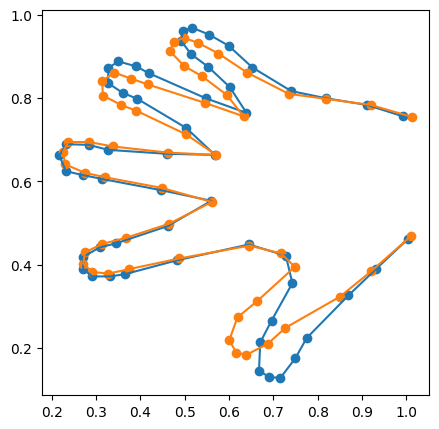

In [84]:
plt.figure(figsize=(5, 5))
plt.plot(pointsets[0][0], pointsets[0][1])
plt.scatter(pointsets[0][0], pointsets[0][1])
plt.plot(pointsets[1][0], pointsets[1][1])
plt.scatter(pointsets[1][0], pointsets[1][1])

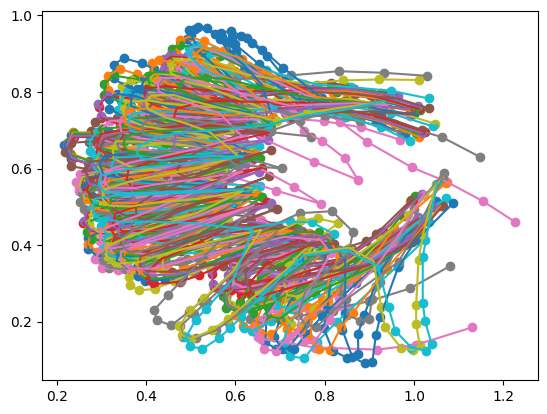

In [85]:
for i in range(40):
    # plt.figure(figsize=(5, 5))
    plt.plot(pointsets[i][0], pointsets[i][1])
    plt.scatter(pointsets[i][0], pointsets[i][1])

Text(0.5, 1.0, 'Pointset 2')

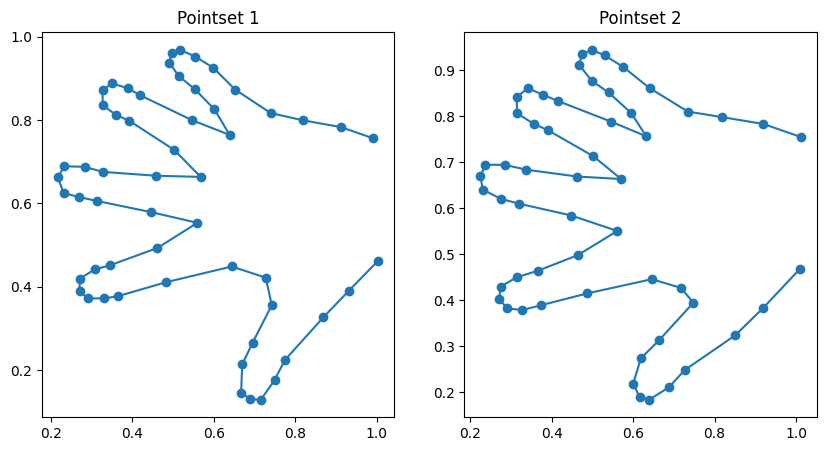

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(pointsets[0][0], pointsets[0][1])
plt.scatter(pointsets[0][0], pointsets[0][1])
plt.title('Pointset 1')

plt.subplot(1, 2, 2)
plt.plot(pointsets[1][0], pointsets[1][1])
plt.scatter(pointsets[1][0], pointsets[1][1])
plt.title('Pointset 2')

In [87]:
pointsets_array = np.array(pointsets)  # Shape: (40, 2, 56)

mean_shape = np.mean(pointsets_array, axis=0)  # Shape: (2, 56)

print("Mean Shape Shape:", mean_shape.shape)

Mean Shape Shape: (2, 56)


In [90]:
#Finding the karcher mean

def centroid_normalize(shape):
    centered_shape = shape - mean_shape
    norm = np.linalg.norm(centered_shape,'fro')
    normalized_shape = centered_shape / norm if norm != 0 else centered_shape
    # print(normalized_shape.shape)
    return normalized_shape

def best_rotation(A, B):
    # print(B.shape)
    U, _, Vt = np.linalg.svd(B.T @ A)
    R = Vt.T @ U
    return B@R
for i in range(x):
    pointsets[i]=centroid_normalize(pointsets[i])
#     # pointsets[i]=best_rotation(pointsets[0], y)

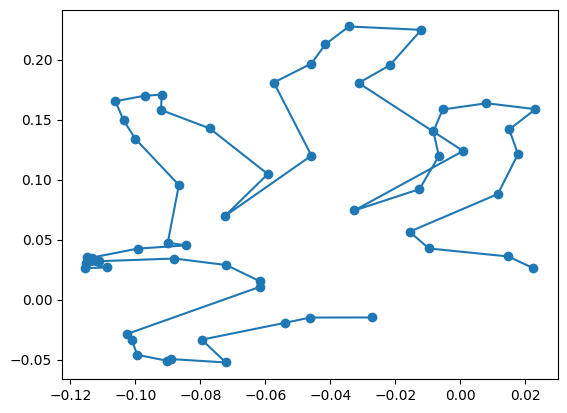

In [92]:
#Procrustes Analysis to find the best rotation to minimize the difference b/w the shapes
plt.plot(pointsets[1][0], pointsets[1][1])
plt.scatter(pointsets[1][0], pointsets[1][1])